# One Arm bandit problem
Technically is the slot machine the fastest way to get you money at the casino.

it differs from $AB$ test that $AB$ test just have exploration after the
experiment is finished then we can start the exploit phase , which is not
optimal is that you are not exploiting best option until the experiment is over

while the reinforcement learning exploit phase start during the experiment
while exploring

* We have $d$ arms , in this case arms are advertisements
* Each time a user connects to this web page that make a round
* At each $n$ round we choose one ad to display to the user
* At each $n$ round , add $i$ gives a reward $r_i(n) {0,1}:r_i(n) = 1$ if the user clicked on the add i , 0 if the user didn't
* Our goal is to maximize the total reward we ger over many rounds


## Steps:

### Step 1 . At Each round n we consider two number for each ad i:
* $N_i(n) $ the number of time the ad i was selected up to a round n
* $R_i(n)$ the sum of rewards of the ad i up yp round n.

### Step 2 From these two number we compute
* average reward of ad up to round n
$\bar{r}_i(n)= \frac{R_i(n)}{N_i(n)}$

* the confidence interval $[\bar{r}_i(n) - \Delta_i(n) , \bar{r}_i(n) + \Delta_i(n)]$ at round n with
$\Delta_i(n) =  \sqrt{\frac{3}{2} \frac{log(n)}{N_i(n)}} $


## Step 3 we select the ad i that has the maximum
$UCB \: \bar{r}_i(n) + \Delta_i(n)$


### The intuition behind the algorithm
Technically we are trying to choose the best distribution while exploting
the best as much as we know, and we can

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
data_sets = pd.read_csv('data_sets/Ads_CTR_Optimisation.csv')


In [16]:
# implementation of UCB

# Steps
N = 10000 # all the users
ads = 10 # number of ads
ads_selected = np.array([])

# each index represent the current ( i )
number_of_selections = np.zeros(ads)

# each index represent the current ( i )
# total accumulated reward
sums_of_rewards = np.zeros(ads)


total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, ads):
        if number_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / number_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1)/ number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            # first round
            upper_bound = 1e400

        if max_upper_bound < upper_bound:
            max_upper_bound = upper_bound
            ad = i

    ads_selected = np.append(ads_selected,values=ad)
    number_of_selections[ad] += 1
    reward = data_sets.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

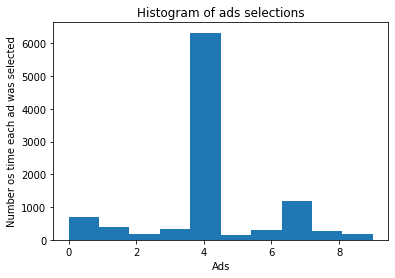

In [18]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number os time each ad was selected')
plt.show()